In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost
import csv

In [ ]:
df=pd.read_csv('weather.csv')


In [4]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98792.000000,98972.000000,97430.000000,55341.000000,48054.000000,93529.000000,98501.000000,97893.000000,97912.000000,97492.000000,89332.000000,89381.000000,59906.000000,58755.000000,98428.000000,97951.000000
mean,12.099031,22.760197,2.522794,5.223462,7.333623,39.614900,13.708734,18.665655,70.907968,53.453083,1017.980590,1015.609314,4.652622,4.685695,16.640304,21.278048
std,6.414717,6.872319,9.083628,3.930612,3.827636,13.942392,9.149930,9.207976,17.747506,20.162639,7.000264,6.913919,2.854070,2.682533,6.394018,6.679870
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,2.600000,4.400000,30.000000,7.000000,11.000000,59.000000,39.000000,1013.400000,1011.000000,2.000000,2.000000,12.000000,16.500000
50%,12.100000,22.500000,0.000000,4.600000,8.200000,37.000000,13.000000,17.000000,71.000000,54.000000,1018.000000,1015.600000,6.000000,5.000000,16.600000,21.000000
75%,17.000000,27.600000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,84.000000,67.000000,1022.600000,1020.200000,7.000000,7.000000,21.400000,25.900000
max,33.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,38.600000,46.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100075 non-null  object 
 1   Location       99998 non-null   object 
 2   MinTemp        98792 non-null   float64
 3   MaxTemp        98972 non-null   float64
 4   Rainfall       97430 non-null   float64
 5   Evaporation    55341 non-null   float64
 6   Sunshine       48054 non-null   float64
 7   WindGustDir    93520 non-null   object 
 8   WindGustSpeed  93529 non-null   float64
 9   WindDir9am     91686 non-null   object 
 10  WindDir3pm     96969 non-null   object 
 11  WindSpeed9am   98501 non-null   float64
 12  WindSpeed3pm   97893 non-null   float64
 13  Humidity9am    97912 non-null   float64
 14  Humidity3pm    97492 non-null   float64
 15  Pressure9am    89332 non-null   float64
 16  Pressure3pm    89381 non-null   float64
 17  Cloud9am       59906 non-null

In [7]:
df.shape


(145460, 23)

In [8]:
df.isnull().sum()

Date             45385
Location         45462
MinTemp          46668
MaxTemp          46488
Rainfall         48030
Evaporation      90119
Sunshine         97406
WindGustDir      51940
WindGustSpeed    51931
WindDir9am       53774
WindDir3pm       48491
WindSpeed9am     46959
WindSpeed3pm     47567
Humidity9am      47548
Humidity3pm      47968
Pressure9am      56128
Pressure3pm      56079
Cloud9am         85554
Cloud3pm         86705
Temp9am          47032
Temp3pm          47509
RainToday        48030
RainTomorrow     48029
dtype: int64

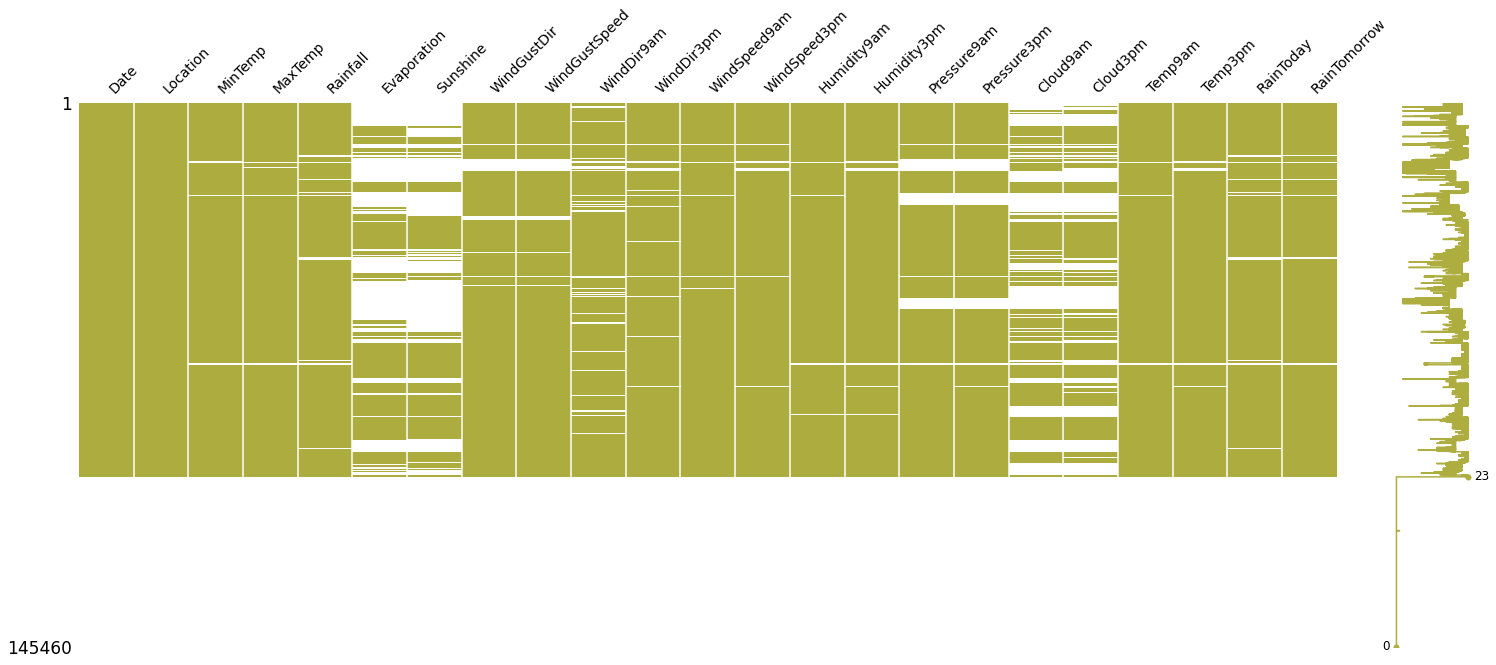

In [9]:
import missingno as msno 
msno.matrix(df, color= (0.678, 0.678, 0.250), fontsize=14)

In [10]:

data_cat = df[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
df.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [11]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)

In [12]:
cat_names = data_cat.columns


In [13]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [14]:
data_cat = imp_mode.fit_transform(data_cat)

In [15]:
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [16]:
df = pd.concat([df,data_cat],axis=1)

In [17]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.730659,0.112688,0.155489,0.159184,0.177139,-0.227412,0.058877,-0.395784,-0.393481,0.910501,0.701173
MaxTemp,0.730659,1.000000,-0.057655,0.041453,-0.045525,0.047451,-0.438802,-0.457694,-0.295213,-0.370361,0.859881,0.973434
Rainfall,0.112688,-0.057655,1.000000,0.121055,0.098753,0.054622,0.213778,0.244808,-0.142432,-0.108301,0.029482,-0.059262
WindGustSpeed,0.155489,0.041453,0.121055,1.000000,0.585390,0.677678,-0.197603,-0.000464,-0.423221,-0.378940,0.130186,0.005792
WindSpeed9am,0.159184,-0.045525,0.098753,0.585390,1.000000,0.542613,-0.236490,0.043759,-0.211444,-0.150879,0.102705,-0.059743
WindSpeed3pm,0.177139,0.047451,0.054622,0.677678,0.542613,1.000000,-0.161764,0.023578,-0.280125,-0.241391,0.169709,0.023075
Humidity9am,-0.227412,-0.438802,0.213778,-0.197603,-0.236490,-0.161764,1.000000,0.603470,0.146666,0.174694,-0.438260,-0.429041
Humidity3pm,0.058877,-0.457694,0.244808,-0.000464,0.043759,0.023578,0.603470,1.000000,-0.013367,0.050583,-0.142820,-0.512034
Pressure9am,-0.395784,-0.295213,-0.142432,-0.423221,-0.211444,-0.280125,0.146666,-0.013367,1.000000,0.959667,-0.374610,-0.258512
Pressure3pm,-0.393481,-0.370361,-0.108301,-0.378940,-0.150879,-0.241391,0.174694,0.050583,0.959667,1.000000,-0.405473,-0.342401


In [19]:
cor = df.corr()

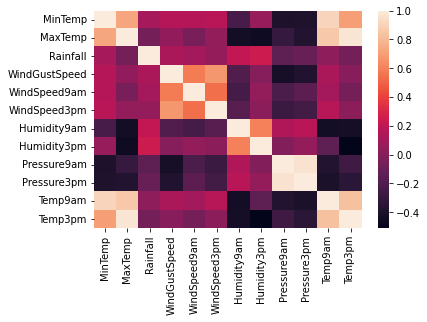

In [21]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

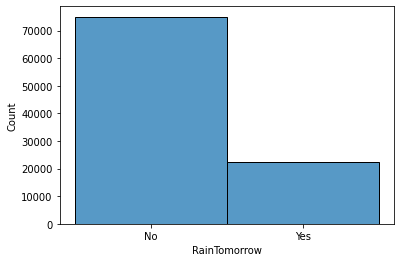

In [22]:
sns.histplot(df['RainTomorrow'])

In [25]:
data = df.fillna(0)

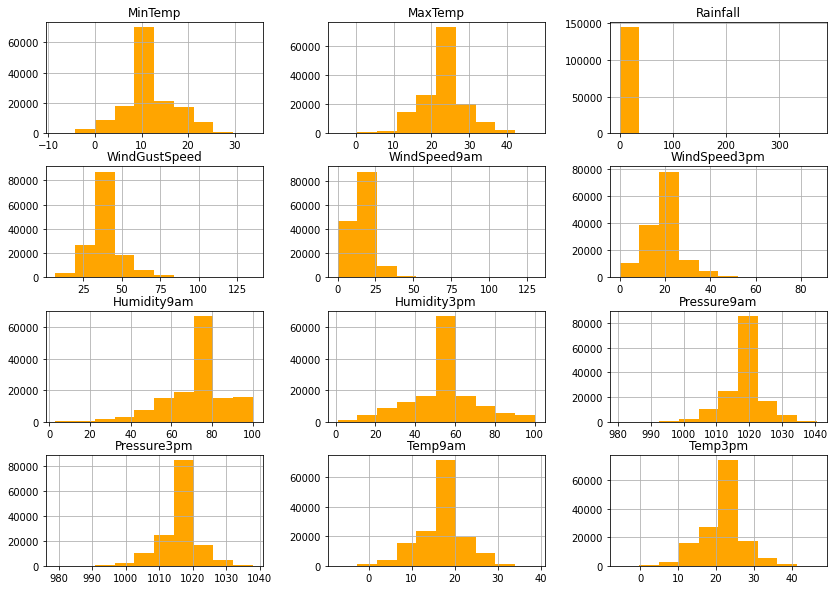

In [26]:
data.hist(figsize=(14,10),color='orange');

# New Section